In [4]:
# data preparation and loading
# get data from pickle file
import cv2
import numpy as np


def unpickle(file):
    import pickle
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict


# get train data 1-6 append them to a list
temp_xTrain = []
temp_yTrain = []
for i in range(1, 6):
    data = unpickle(
        r"C:\Users\mert\Desktop\yazılımlar\python\computer vision\cs231n\cifar-10-batches-py\data_batch_"+str(i))
    temp_xTrain.append(data[b'data'])
    temp_yTrain.append(data[b'labels'])

# make one list from the list of lists train data is now ready
temp_xTrain = np.concatenate(temp_xTrain)
temp_yTrain = np.concatenate(temp_yTrain)

# use only first 10000 data to test
temp_xTrain = temp_xTrain[:10000]
temp_yTrain = temp_yTrain[:10000]

tmpXtrain = []
for id, im in enumerate(temp_xTrain):
    im = np.reshape(im, (3, 1024))
    tmpXtrain.append((np.reshape(im, (3, 32, 32))).transpose(
        1, 2, 0))  # 1. başta 2. ortada 0. en sonda
temp_xTrain = np.array(tmpXtrain)

tmpXtrainGray = []
for id, im in enumerate(temp_xTrain):
    ima = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    tmpXtrainGray.append(ima)
temp_xTrain = np.array(tmpXtrainGray)

train_len = temp_xTrain.shape[0]

temp_xTrain=np.reshape(temp_xTrain,(train_len,1024))
#############################################################################


xTrain1 = temp_xTrain[:train_len//5]
xTrain2 = temp_xTrain[train_len//5:2*train_len//5]
xTrain3 = temp_xTrain[2*train_len//5:3*train_len//5]
xTrain4 = temp_xTrain[3*train_len//5:4*train_len//5]
xTrain5 = temp_xTrain[4*train_len//5:]
xTRAINS = (xTrain1, xTrain2, xTrain3, xTrain4, xTrain5)

yTrain1 = temp_yTrain[:train_len//5]
yTrain2 = temp_yTrain[train_len//5:2*train_len//5]
yTrain3 = temp_yTrain[2*train_len//5:3*train_len//5]
yTrain4 = temp_yTrain[3*train_len//5:4*train_len//5]
yTrain5 = temp_yTrain[4*train_len//5:]
yTRAINS = (yTrain1, yTrain2, yTrain3, yTrain4, yTrain5)

# get test data
data = unpickle(
    r"C:\Users\mert\Desktop\yazılımlar\python\computer vision\cs231n\cifar-10-batches-py\test_batch")
xTest = (data[b'data'])
yTest = (data[b'labels'])


import matplotlib.pyplot as plt
import cv2
im = temp_xTrain[134]
im=np.reshape(im,(32,32))
plt.imshow(im, cmap="gray")


In [5]:
class NearestNeighbor:
    def train(self, XTrain, YTrain):
        self.XTrain = XTrain
        self.YTrain = YTrain

    def predict(self, XTest, k=1):
        num_test = XTest.shape[0]
        YPrediction = np.zeros(num_test, dtype=self.YTrain.dtype)
        for i in range(num_test):
            distances = np.sum(abs(XTest[i, :] - self.XTrain), axis=1)
            # All elements smaller than the kth element are before moved before this element(think position)
            minDistances = np.partition(distances, k-1)[:k]

            minIndices = []
            for dist in minDistances:
                minIndices.append(np.where(distances == dist)[0][0])

            trainList = []
            for id in minIndices:
                trainList.append(self.YTrain[id])

            YPrediction[i] = max(trainList, key=trainList.count)

        return YPrediction


accuracy: 0.2165 at k=1
accuracy: 0.207 at k=1
accuracy: 0.2045 at k=1
accuracy: 0.1935 at k=1
accuracy: 0.223 at k=1
accuracy: 0.222 at k=5
accuracy: 0.23 at k=5
accuracy: 0.205 at k=5
accuracy: 0.216 at k=5
accuracy: 0.24 at k=5
accuracy: 0.2305 at k=10
accuracy: 0.232 at k=10
accuracy: 0.2015 at k=10
accuracy: 0.217 at k=10
accuracy: 0.2295 at k=10
accuracy: 0.222 at k=20
accuracy: 0.2415 at k=20
accuracy: 0.216 at k=20
accuracy: 0.216 at k=20
accuracy: 0.2245 at k=20


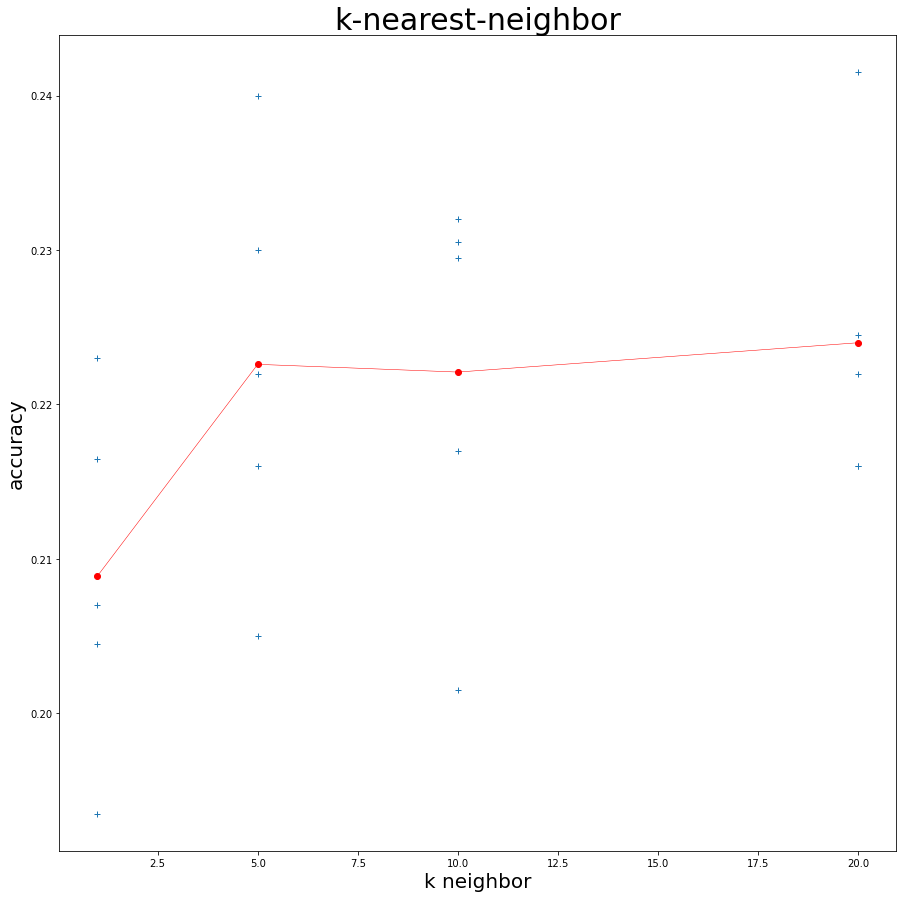

In [6]:
import matplotlib.pyplot as plt

k_list = [1, 5,10,20]
validation_accuracies = []
nn = NearestNeighbor()
for k in k_list:
    for xValidation, yValidation in zip(xTRAINS, yTRAINS):
        # use a particular value of k and evaluation on validation data
        #otherXTrains=list(filter(lambda xtrain: xtrain==xValidation,xTRAINS))

        otherXTrains = [
            xtrain for xtrain in xTRAINS if not np.allclose(xtrain, xValidation)]
        otherXTrains = np.concatenate(otherXTrains)

        #otherYTrains=[ytrain for ytrain in yTRAINS if ytrain != yValidation]

        otherYTrains = [
            ytrain for ytrain in yTRAINS if not np.allclose(ytrain, yValidation)]
        otherYTrains = np.concatenate(otherYTrains)

        nn.train(otherXTrains, otherYTrains)
        yPredict = nn.predict(xValidation, k)
        acc = np.mean(yPredict == yValidation)
        print(f'accuracy: {acc} at k={k}')
        # keep track of what works on the validation set
        validation_accuracies.append((k, acc))

x, y = zip(*validation_accuracies)
plt.figure(figsize=(15, 15))
plt.plot(x, y, "+")

acc_dict = {}
for x, y in validation_accuracies:
    if x not in acc_dict:
        acc_dict[x] = [y]
    else:
        acc_dict[x].append(y)
means = []
for k in k_list:
    means.append(np.mean(acc_dict[k]))

plt.plot(k_list, means, "ro",)
plt.plot(k_list, means, "r-", linewidth=0.5)
plt.xlabel("k neighbor", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.title("k-nearest-neighbor", fontsize=30)
plt.show()
